In [212]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end
include("/home/sergey/work/repo/dynamical-systems/system.jl")
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD2

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [213]:
function get_u0(x1, y1, x2, y2)
    z = y1 - y2
    return SVector{5}([x1, y1, x2, y2, z])
end

get_u0 (generic function with 1 method)

In [214]:
#=
parameters[3] = 0.02
parameters[7] = 0.004
parameters[8] = 0.1
=#
cycle = SVector(-1.5075165133121957, -0.34359566282900644, 1.793741761693626, -0.12487391025344946, -0.218721752575605140)

5-element SVector{5, Float64} with indices SOneTo(5):
 -1.5075165133121957
 -0.34359566282900644
  1.793741761693626
 -0.12487391025344946
 -0.21872175257560514

In [310]:
parameters = FHN2_try3_params()
tspan = (0.0, 5000.0)
parameters[3] = 0.02
parameters[7] = 0.08
parameters[8] = 0.1

u0 = get_u0(1.0,2.0,3.0,4.0)

u0 = SVector{5}(u0)
prob = ODEProblem(FHN2_try3, cycle, tspan, parameters)
sol = solve(prob, Vern9(), adaptive = true, abstol = 1e-9, reltol  = 1e-9); sol

retcode: Success
Interpolation: specialized 9th order lazy interpolation
t: 11921-element Vector{Float64}:
    0.0
    0.003077909197542507
    0.005053871762526304
    0.008021002119953154
    0.010678824217039213
    0.013966823170886135
    0.017272173914617685
    0.021046640125331306
    0.02499578478868355
    0.029332103416593567
    ⋮
 4996.937970646426
 4997.361645296458
 4997.7953950673245
 4998.214431300709
 4998.691948038788
 4999.098609952355
 4999.533291557053
 4999.9514331528035
 5000.0
u: 11921-element Vector{SVector{5, Float64}}:
 [-1.5075165133121957, -0.34359566282900644, 1.793741761693626, -0.12487391025344946, -0.21872175257560514]
 [-1.4423325611421485, -0.3450200440968166, 1.7340841951718782, -0.11634593150244134, -0.2286741125944234]
 [-1.4116374233636424, -0.34584286592325836, 1.7112550828455941, -0.11094767767975673, -0.23489518824354982]
 [-1.37612336332769, -0.346979262486982, 1.6890555575773674, -0.10290902411870333, -0.2440702383683269]
 [-1.3518302488265,

In [314]:
ds = CoupledODEs(FHN2_try3, sol[end], parameters,
diffeq = ( alg = Vern9(), adaptive = true, abstol = 1e-9, reltol  = 1e-9));
LLE = lyapunovspectrum(ds, 20000)

5-element Vector{Float64}:
  6.789182880836959e-7
  0.00012911301291443686
 -0.0006139387121555397
 -1.6756079554490249
 -1.6751120636302879

In [311]:
function get_percent(number, percent)
    return floor(Int64, (number / 100) * percent )
end

get_percent (generic function with 1 method)

In [312]:
indexx, indexy, indexz = 1, 3, 4

ticksize = 25
labelsize = 40
lw = 1.0
colorline = :deeppink

:deeppink

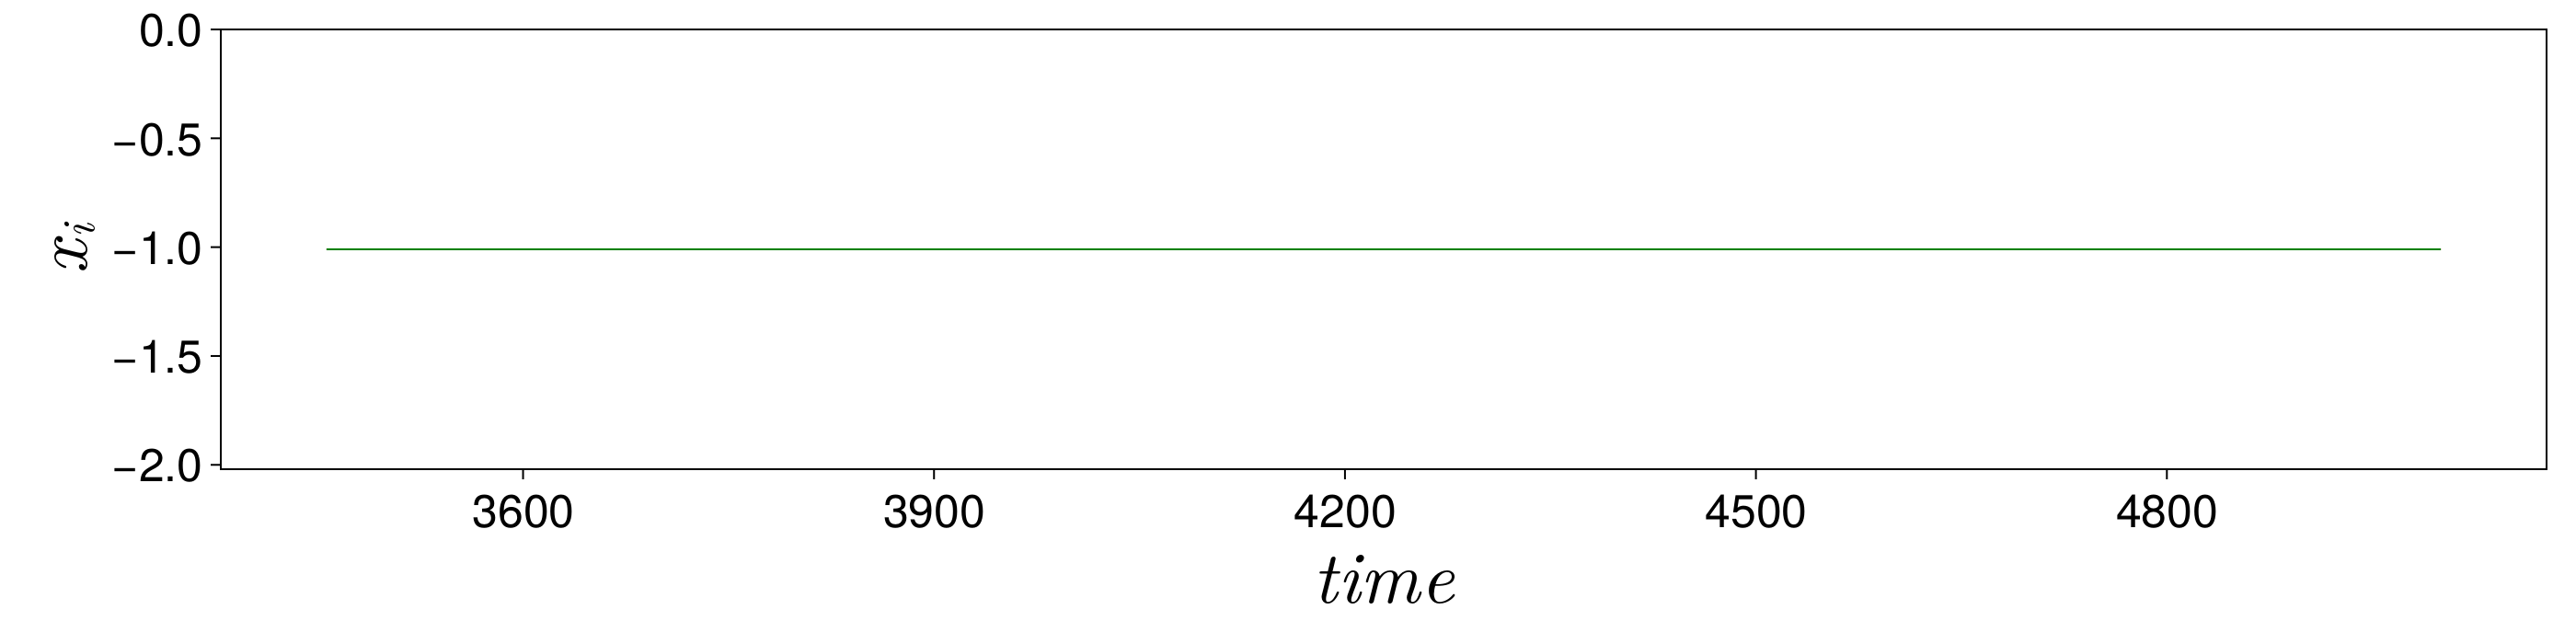

CairoMakie.Screen{IMAGE}


In [313]:
soltimeseries = sol
len_sol = length(sol)

tstart = get_percent( len_sol, 70); tend = len_sol

f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, soltimeseries.t[tstart:tend], soltimeseries[indexy, tstart:tend], color = :green, linewidth = lw)

display(f)

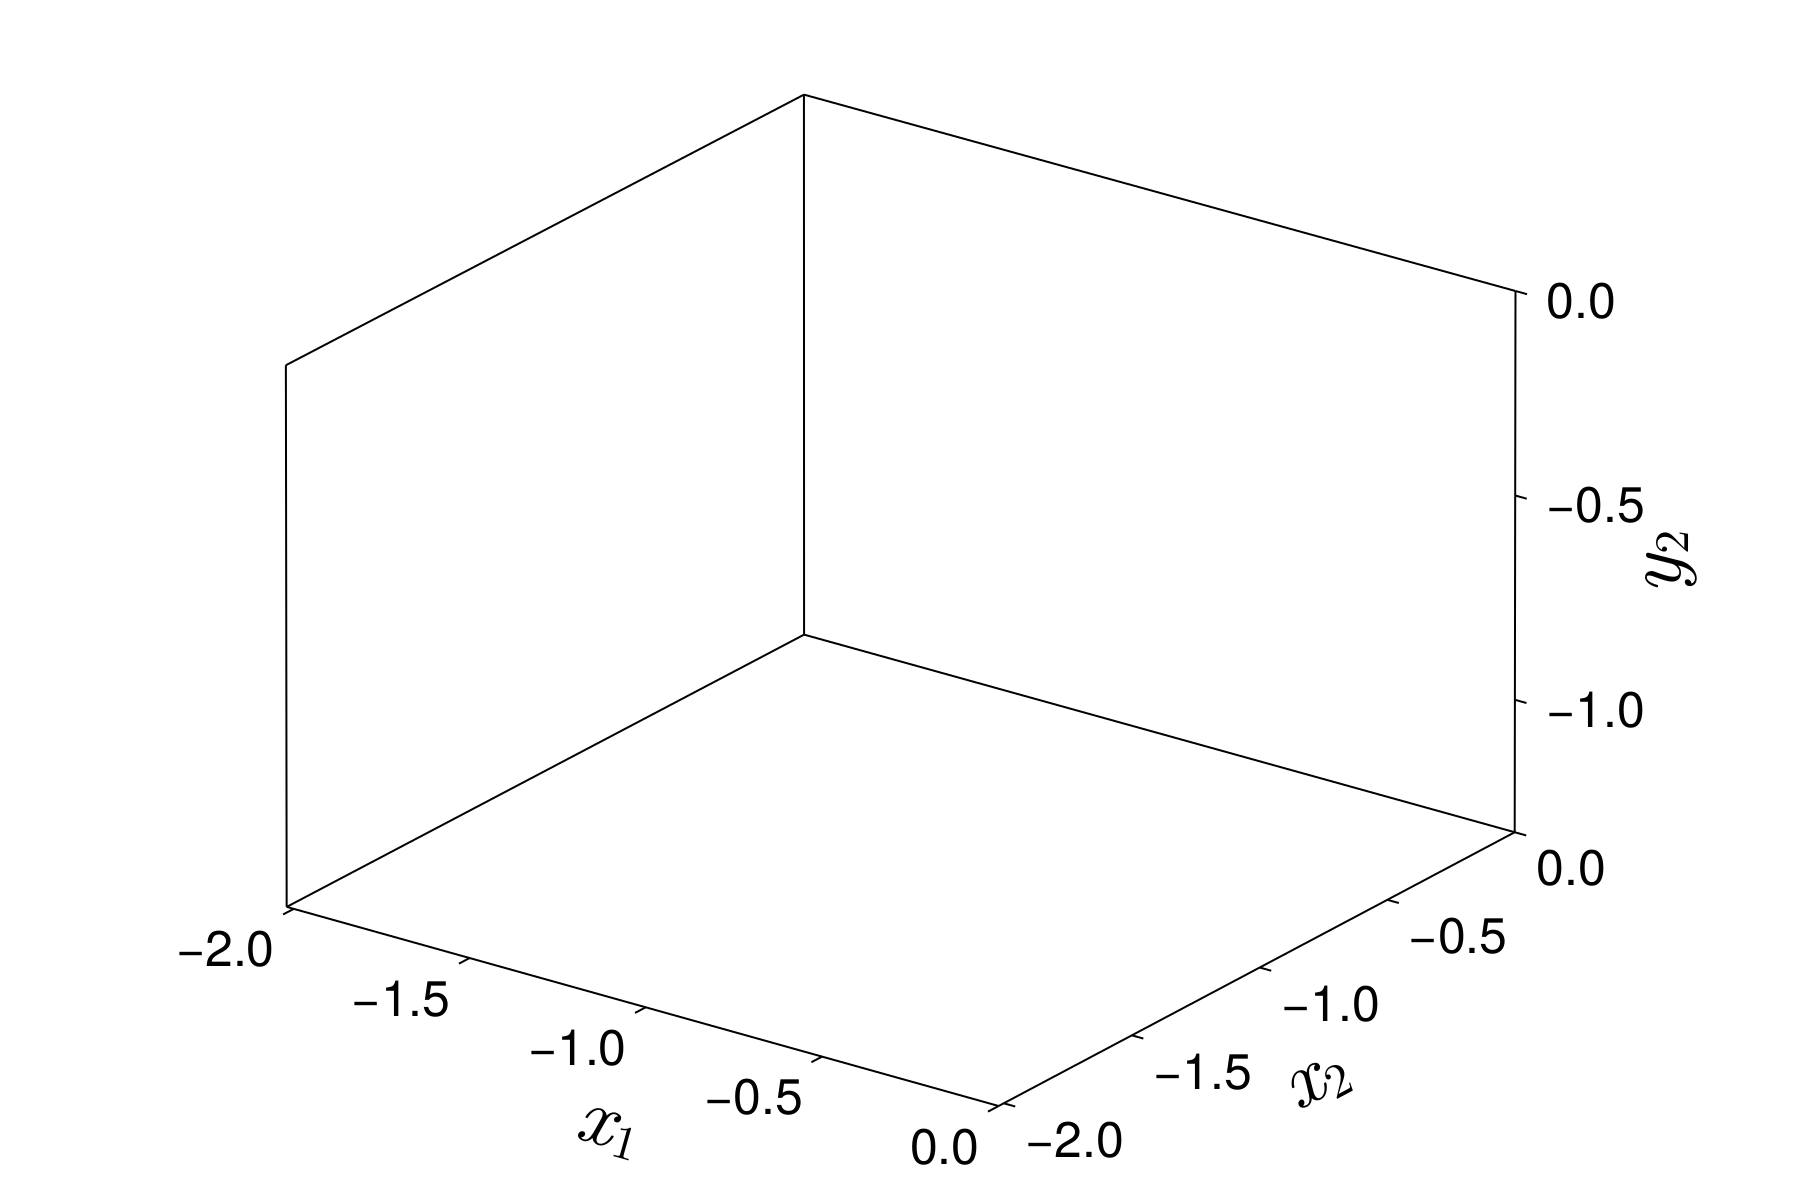

CairoMakie.Screen{IMAGE}


In [301]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)

tst1 = get_percent( len_sol, 99)
ted1 = len_sol
lines!(ax3d, sol[indexx, tst1:ted1],
 sol[indexy, tst1:ted1],
  sol[indexz, tst1:ted1], linewidth = lw, color = colorline)

display(f)